In [81]:
import os
import pandas as pd
import importlib
import sys
sys.path.append(os.path.abspath("../"))
import balance_df
import eval_automate
import eval_metrics
importlib.reload(eval_automate)
importlib.reload(eval_metrics)
from eval_automate import run_evaluation
from eval_metrics import evaluate_model, custom_threshold_condition
from balance_df import balance_dataset
# Load a specific dataset
# df = pd.read_csv("some_new_dataset.csv")

# Run evaluation only on this dataset
# run_evaluation(df, "some_new_dataset")


### LSTM Toxic Comments

In [55]:
lt = pd.read_csv("lstm_toxiccomment.csv")
run_evaluation(lt, "lstm_toxiccomment")


🚀 Running evaluation for lstm_toxiccomment at threshold=0.5...
⚠️ Error processing lstm_toxiccomment: unhashable type: 'numpy.ndarray'


In [57]:
lt.head()

,id,comment_text,true_label,toxic_prob,severe_toxic_prob,obscene_prob,threat_prob,insult_prob,identity_hate_prob,toxic_pred,severe_toxic_pred,obscene_pred,threat_pred,insult_pred,identity_hate_pred
0,55858b89f99e9bda,Hope he dies \n\nNow this Atheist filth's wife...,1,0.136890,0.000526,0.007290,0.001021,0.017765,0.020823,1,0,0,0,1,1
1,425a1dbdf740e9b8,"2006 (UTC)\n\n Removed Merge 17:15, 5 April",0,0.001754,0.000038,0.000460,0.000030,0.000306,0.000106,0,0,0,0,0,0
2,20c81b99f7adf557,John discuss it here \n\nSeems you don't like ...,0,0.004635,0.000034,0.000684,0.000046,0.000789,0.000098,0,0,0,0,0,0
3,af0dce6ce84974ec,"""\nTo answer your question, no. There is no si...",0,0.001644,0.000012,0.000280,0.000010,0.000257,0.000036,0,0,0,0,0,0
4,a069e6d6d1a2348d,"""\n But Arpad can cite any webpage he finds, o...",0,0.000783,0.000004,0.000128,0.000003,0.000100,0.000017,0,0,0,0,0,0


In [59]:
lt['threat_pred'].value_counts()

threat_pred
0    712
1    666
Name: count, dtype: int64


📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       0.89      0.92      0.90       689
      Threat       0.92      0.89      0.90       689

    accuracy                           0.90      1378
   macro avg       0.90      0.90      0.90      1378
weighted avg       0.90      0.90      0.90      1378


✅ Accuracy: 0.9020
✅ Precision: 0.9159
✅ Recall: 0.8853
✅ F1 Score: 0.9004


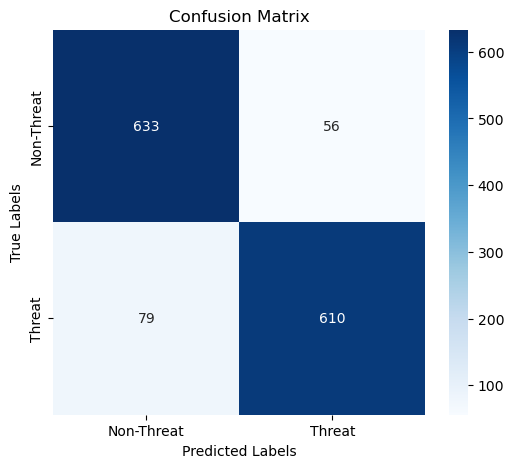

In [61]:
evaluate_model(y_true=lt['true_label'], y_pred=lt['threat_pred'], class_labels=["Not Threat", "Threat"])

### LSTM Jigsaw

In [51]:
jigsaw = pd.read_csv("lstm_jigsaw.csv")
jigsaw.head()

,id,comment_text,toxicity,severe_toxicity,obscene,sexual_explicit,identity_attack,insult,Threat_Jigsaw,toxicity_annotator_count,...,obscene_prob,threat_prob,insult_prob,identity_hate_prob,toxic_pred,severe_toxic_pred,obscene_pred,threat_pred,insult_pred,identity_hate_pred
0,304799,Is your concern satisfied by the fact that the...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,4,...,0.002211,0.000197,0.003317,0.000432,1,0,0,0,0,0
1,5293619,Comey's firing is a separate issue from the ma...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,4,...,0.018285,0.002163,0.060348,0.023202,1,0,1,0,1,1
2,5009206,klastri> besides the legal points. She shoul...,0.500000,0.1,0.000000,0.0,0.000000,0.100000,0.500000,10,...,0.000708,0.000036,0.000910,0.000118,0,0,0,0,0,0
3,6122758,Trump has been the only one to threaten to wip...,0.536232,0.0,0.086957,0.0,0.057971,0.536232,0.043478,69,...,0.184227,0.046887,0.320257,0.092132,1,1,1,1,1,1
4,6018742,"Just listen to yourself.\n""the swamp"" (twice!)...",0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,4,...,0.002334,0.000235,0.004179,0.002365,1,0,0,0,0,0



📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       0.67      0.96      0.79       747
      Threat       0.84      0.29      0.44       498

    accuracy                           0.70      1245
   macro avg       0.76      0.63      0.61      1245
weighted avg       0.74      0.70      0.65      1245


✅ Accuracy: 0.6956
✅ Precision: 0.8439
✅ Recall: 0.2932
✅ F1 Score: 0.4352


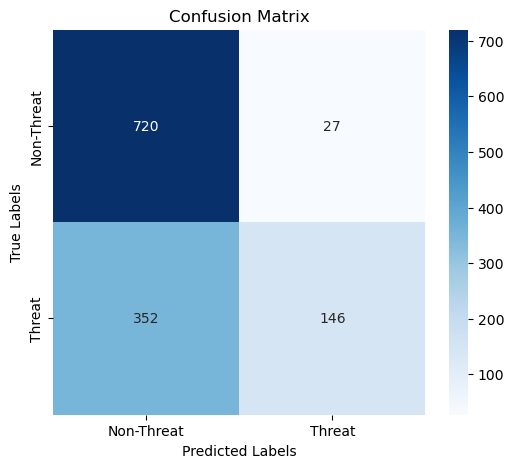

In [53]:
evaluate_model(y_true=jigsaw['true_label'], y_pred=jigsaw['threat_pred'], class_labels=["Not Threat", "Threat"])

### Combined Profanity Toxicity

In [68]:
combined = pd.read_csv("lstm_combined.csv")
combined.head()

,text,labels,encoded_labels,true_label,toxic_prob,severe_toxic_prob,obscene_prob,threat_prob,insult_prob,identity_hate_prob,toxic_pred,severe_toxic_pred,obscene_pred,threat_pred,insult_pred,identity_hate_pred
0,Agree. The number of morons that shoot animal...,['toxic' 'threat' 'insult'],"[1, 0, 1, 0, 1, 0, 0, 0, 0]",1,0.653807,0.007624,0.152094,0.012274,0.230443,0.033084,1,0,1,1,1,1
1,"""As long as we get to shoot them at some point...",['toxic' 'threat'],"[1, 0, 0, 0, 1, 0, 0, 0, 0]",1,0.026195,0.000256,0.003350,0.000402,0.004154,0.002352,1,0,0,0,0,0
2,mad know take never felt angry mad never get g...,['selfharm'],"[0, 0, 0, 0, 0, 0, 0, 1, 0]",0,0.983333,0.334376,0.922124,0.122340,0.805882,0.223243,1,1,1,1,1,1
3,The RINOS in charge of the Congress would neve...,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0.017157,0.000114,0.002492,0.000168,0.003212,0.000866,1,0,0,0,0,0
4,Which of Trump's appointments do you believe w...,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0]",0,0.072502,0.000769,0.009774,0.001637,0.015204,0.004770,1,0,0,0,1,0


In [70]:
combined['threat_pred'].value_counts()

threat_pred
0    665
1    195
Name: count, dtype: int64


📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       0.68      0.88      0.77       516
      Threat       0.67      0.38      0.49       344

    accuracy                           0.68       860
   macro avg       0.68      0.63      0.63       860
weighted avg       0.68      0.68      0.65       860


✅ Accuracy: 0.6779
✅ Precision: 0.6718
✅ Recall: 0.3808
✅ F1 Score: 0.4861


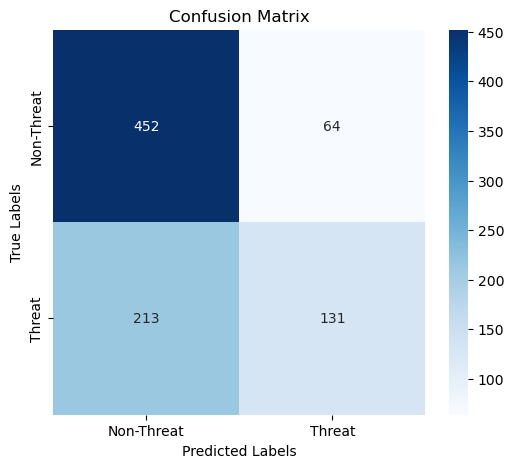

In [72]:
evaluate_model(y_true=combined['true_label'], y_pred=combined['threat_pred'], class_labels=["Not Threat", "Threat"])

### Suspicious Tweets

In [75]:
sus = pd.read_csv("lstm_sus.csv")
sus.head()

,message,label,toxic_prob,severe_toxic_prob,obscene_prob,threat_prob,insult_prob,identity_hate_prob,toxic_pred,severe_toxic_pred,obscene_pred,threat_pred,insult_pred,identity_hate_pred
0,@MsLynnGallo Never mind - You missed the joke ...,0,0.125851,0.001095,0.021573,0.002309,0.027429,0.001732,1,0,1,0,1,0
1,turns out there had been #earthquake warnings ...,1,0.006965,0.000050,0.000833,0.000067,0.001128,0.000178,0,0,0,0,0,0
2,@susanhutchinson The other thing is the accent...,0,0.164913,0.002392,0.056861,0.003184,0.050149,0.004040,1,0,1,0,1,0
3,@LolKate18 You like Ladyhawke? You are so cool,0,0.308234,0.004120,0.036226,0.005711,0.101464,0.004473,1,0,1,0,1,0
4,#asot400 we want to see some pics of the locat...,0,0.004248,0.000064,0.000888,0.000054,0.000788,0.000184,0,0,0,0,0,0


In [83]:
sus['label'].value_counts()

label
0    9217
1    6145
Name: count, dtype: int64


📊 Classification Report:
              precision    recall  f1-score   support

  Non-Threat       0.62      0.94      0.75      9217
      Threat       0.62      0.16      0.25      6145

    accuracy                           0.62     15362
   macro avg       0.62      0.55      0.50     15362
weighted avg       0.62      0.62      0.55     15362


✅ Accuracy: 0.6247
✅ Precision: 0.6223
✅ Recall: 0.1574
✅ F1 Score: 0.2512


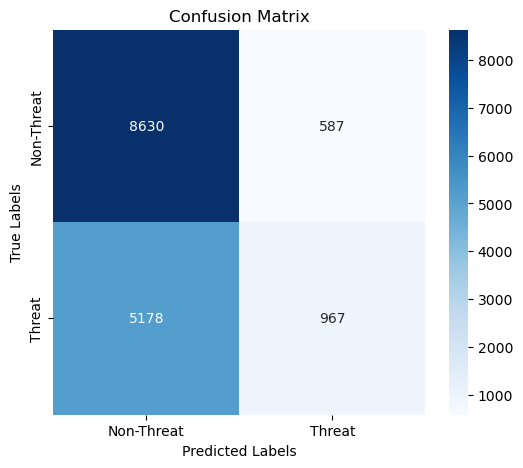

In [87]:
evaluate_model(y_true=sus['label'], y_pred=sus['threat_pred'], class_labels=["Not Threat", "Threat"])